In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plot_neuron(name):
    data = pd.read_csv('./tests/results/%s.csv' % name, index_col=0)
    data.plot()
    plt.title(name)

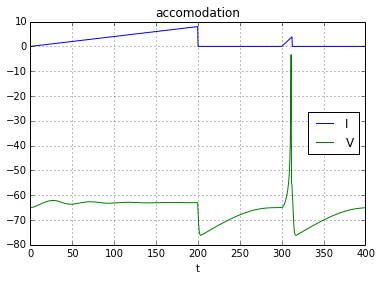

In [9]:
plot_neuron("accomodation")

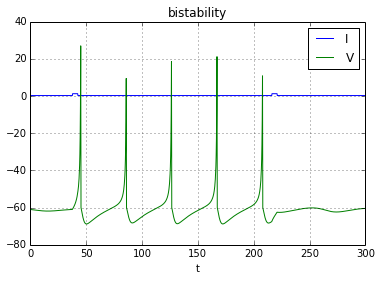

In [10]:
plot_neuron("bistability")

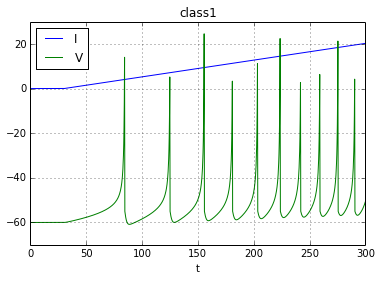

In [11]:
plot_neuron("class1")

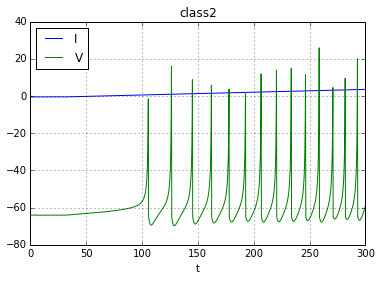

In [12]:
plot_neuron("class2")

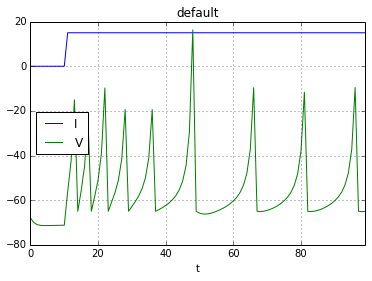

In [13]:
plot_neuron("default")

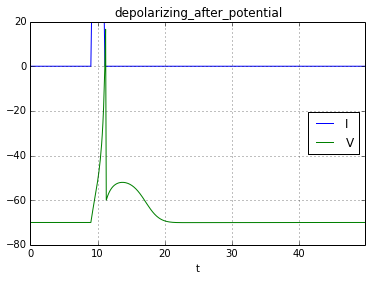

In [14]:
plot_neuron("depolarizing_after_potential")

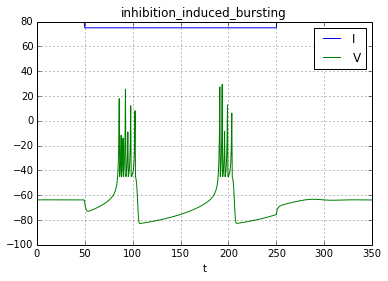

In [15]:
plot_neuron("inhibition_induced_bursting")

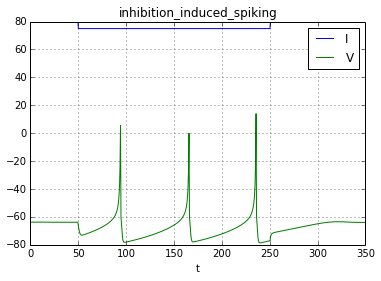

In [16]:
plot_neuron("inhibition_induced_spiking")

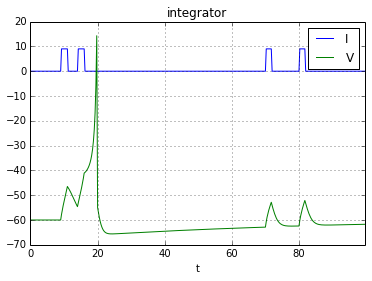

In [17]:
plot_neuron("integrator")

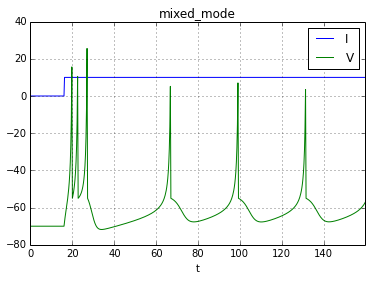

In [18]:
plot_neuron("mixed_mode")

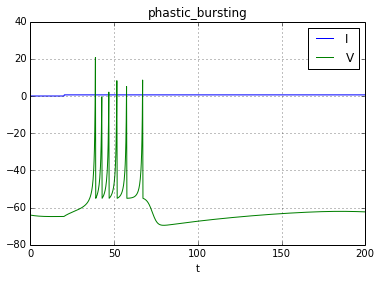

In [19]:
plot_neuron("phastic_bursting")

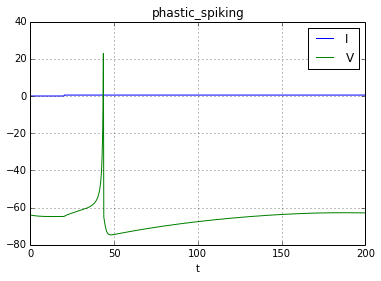

In [20]:
plot_neuron("phastic_spiking")

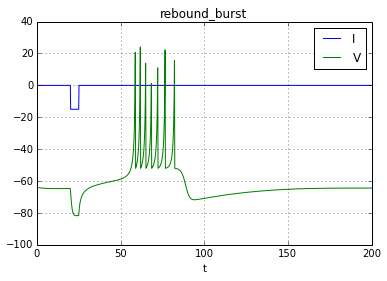

In [21]:
plot_neuron("rebound_burst")

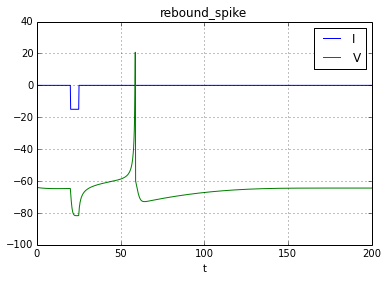

In [22]:
plot_neuron("rebound_spike")

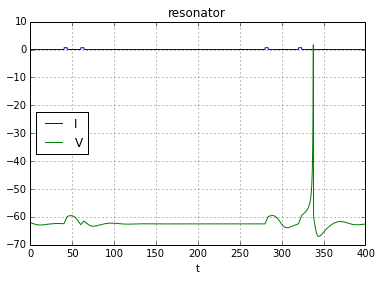

In [23]:
plot_neuron("resonator")

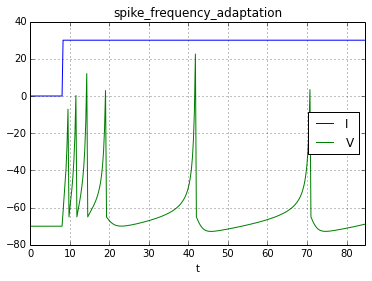

In [24]:
plot_neuron("spike_frequency_adaptation")

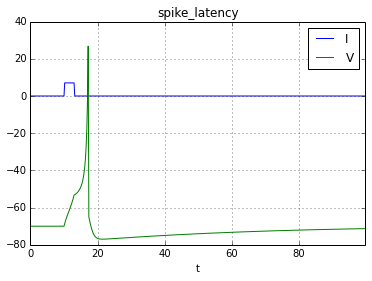

In [25]:
plot_neuron("spike_latency")

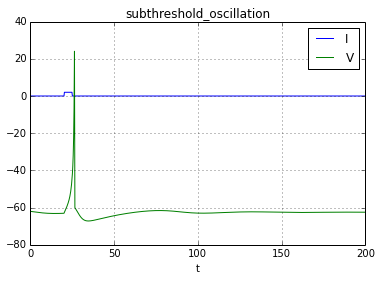

In [26]:
plot_neuron("subthreshold_oscillation")

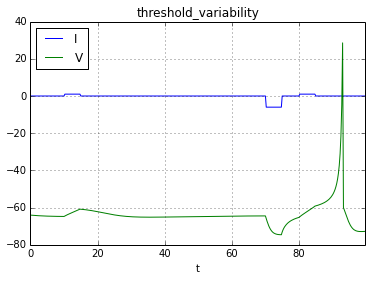

In [27]:
plot_neuron("threshold_variability")

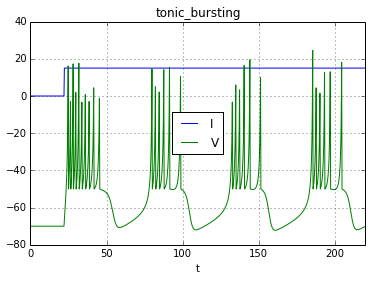

In [28]:
plot_neuron("tonic_bursting")

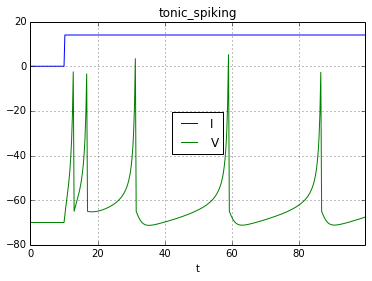

In [29]:
plot_neuron("tonic_spiking")

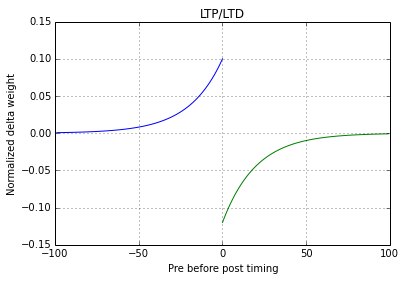

In [39]:
ltp = pd.read_csv('./tests/results/stdp_ltp.csv')
ltd = pd.read_csv('./tests/results/stdp_ltd.csv')

plt.plot(ltp["t"], ltp["d"])
plt.plot(ltd["t"], ltd["d"])

plt.grid(True)
plt.xlabel("Pre before post timing")
plt.ylabel("Normalized delta weight")
plt.title("LTP/LTD")